In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/SP22/CI/Lecture 8/apples_and_oranges.csv")

In [3]:
data

,weight,size,class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange
5,73,5.68,apple
6,70,5.56,apple
7,75,5.11,apple
8,74,5.36,apple
9,65,4.27,orange


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [ ]:
type(training_set)
training_set

,weight,size,class
2,65,4.09,orange
10,73,5.79,apple
4,67,4.70,orange
1,69,4.21,orange
13,68,4.47,orange
0,69,4.39,orange
14,74,5.22,apple
9,65,4.27,orange
8,74,5.36,apple
12,74,5.53,apple


In [7]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values
type(X_test)
X_train

array([[65.  ,  4.09],
       [73.  ,  5.79],
       [67.  ,  4.7 ],
       [69.  ,  4.21],
       [68.  ,  4.47],
       [69.  ,  4.39],
       [74.  ,  5.22],
       [65.  ,  4.27],
       [74.  ,  5.36],
       [74.  ,  5.53],
       [70.  ,  5.47],
       [73.  ,  5.68]])

In [ ]:
X_test
type(X_test)

numpy.ndarray

In [24]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(kernel='linear', random_state=1)

In [25]:
X_test1=[[66,4.19],[66,4.19],[66,4.19]]

In [26]:
Y_pred = classifier.predict(X_test1)

In [27]:
test_set["Predictions"] = Y_pred

In [28]:
test_set

,weight,size,class,Predictions
3,72,5.85,apple,orange
7,75,5.11,apple,orange
6,70,5.56,apple,orange


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  1.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

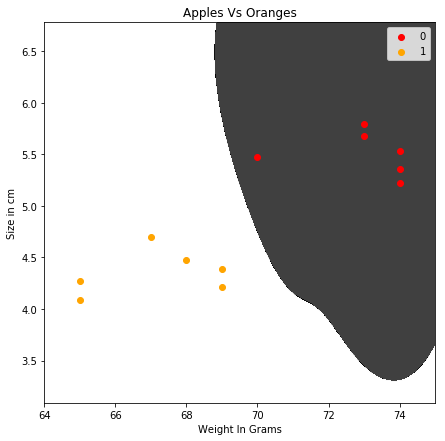

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


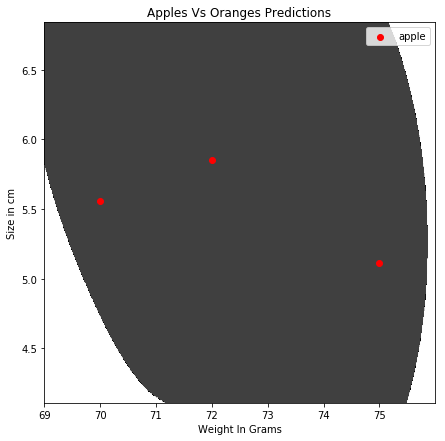

In [ ]:
#Prediction Plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('red', 'orange'))(i), label = j)
plt.title('Apples Vs Oranges Predictions')
plt.xlabel('Weight In Grams')
plt.ylabel('Size in cm')
plt.legend()
plt.show()